## CSCI-5800 |  BMS Lab04 - OCV Curve 🧪
<h5>Done by Sundeep Dayalan (02-07-2024)</h5>

> **See Also**: To refer full code, visit [GitHub Code](https://github.com/Sundeep-D/Battery-management-System-Labs).

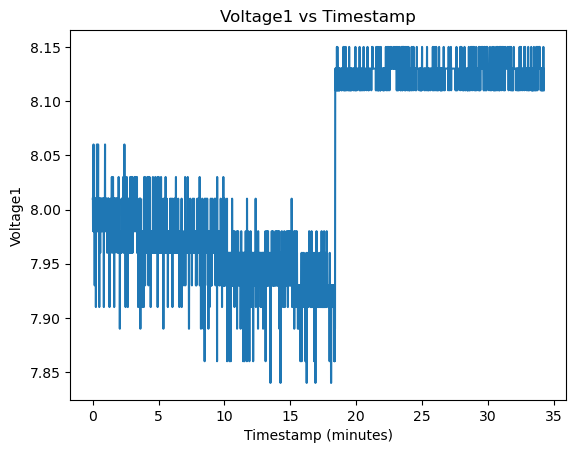

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df = pd.read_csv('OCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Plot the graph
plt.plot(df['Timestamp'], df['Voltage1'])
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Voltage1 vs Timestamp')
plt.show()


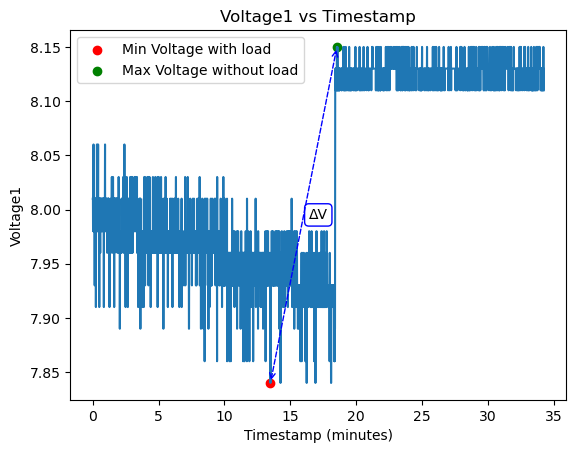

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
    
# Load CSV file into a DataFrame
df = pd.read_csv('OCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Print minimum and maximum values of Voltage1
min_voltage = df['Voltage1'].min()
max_voltage = df['Voltage1'].max()

# Plot the graph
plt.plot(df['Timestamp'], df['Voltage1'])
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Voltage1 vs Timestamp')

# Highlight minimum and maximum values on the plot with annotations
plt.scatter(df['Timestamp'][df['Voltage1'].idxmin()], min_voltage, color='red', label='Min Voltage with load')
plt.scatter(df['Timestamp'][df['Voltage1'].idxmax()], max_voltage, color='green', label='Max Voltage without load')

# Add vertical arrow from min point to max point
plt.annotate('', xy=(df['Timestamp'][df['Voltage1'].idxmax()], max_voltage),
             xytext=(df['Timestamp'][df['Voltage1'].idxmin()], min_voltage),
             arrowprops=dict(arrowstyle='<->', linestyle='dashed', color='blue'))

# Calculate voltage drop as per ΔV=V_initial − V_final
voltage_drop = min_voltage - max_voltage

# Highlight voltage drop on the plot
plt.annotate(f'ΔV', xy=(0.5, 0.5), xycoords='axes fraction',
             ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='none'))


# Show legend for the markers
plt.legend()

plt.show()


# Calculate Voltage Drop ∆V


> **Formula**: ΔV=V_initial − V_final


<h2>Min Voltage: 7.84V</h2>

<h2>Max Voltage: 8.15V</h2>

<h2>Voltage Drop: -0.31V</h2>

<h2>Average Current: 27.78 mA</h2>

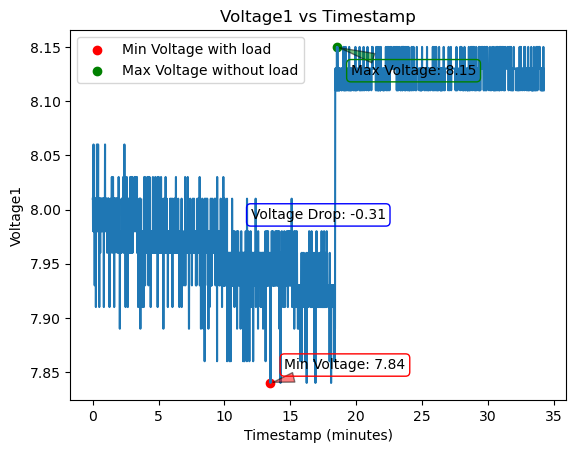

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

def printmd(string, size=2):
    display(Markdown(f'<h{size}>{string}</h{size}>'))
    
# Load CSV file into a DataFrame
df = pd.read_csv('OCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Print minimum and maximum values of Voltage1
min_voltage = df['Voltage1'].min()
max_voltage = df['Voltage1'].max()
printmd(f'Min Voltage: {min_voltage:.2f}V')
printmd(f'Max Voltage: {max_voltage:.2f}V')

# Plot the graph
plt.plot(df['Timestamp'], df['Voltage1'])
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Voltage1 vs Timestamp')

# Highlight minimum and maximum values on the plot with annotations
plt.scatter(df['Timestamp'][df['Voltage1'].idxmin()], min_voltage, color='red', label='Min Voltage with load')
plt.scatter(df['Timestamp'][df['Voltage1'].idxmax()], max_voltage, color='green', label='Max Voltage without load')
plt.annotate(f'Min Voltage: {min_voltage:.2f}', 
             xy=(df['Timestamp'][df['Voltage1'].idxmin()], min_voltage),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='none'))

plt.annotate(f'Max Voltage: {max_voltage:.2f}', 
             xy=(df['Timestamp'][df['Voltage1'].idxmax()], max_voltage),
             xytext=(10, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='green', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='none'))

# # Calculate voltage drop
# voltage_drop = max_voltage - min_voltage
# Calculate voltage drop as per ΔV=V_initial − V_final
voltage_drop = min_voltage - max_voltage

# Highlight voltage drop on the plot
plt.annotate(f'Voltage Drop: {voltage_drop:.2f}', xy=(0.5, 0.5), xycoords='axes fraction',
             ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='none'))

voltage_drop=round(voltage_drop,2)
# Print voltage drop value
printmd(f'Voltage Drop: {voltage_drop}V')

# Calculate average current excluding zero values
current = df.loc[df['Current'] != 0, 'Current'].mean()

# # Highlight average current on the plot
# plt.annotate(f'Average Current: {average_current:.2f} A', xy=(0.5, 0.3), xycoords='axes fraction',
#              ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='orange', facecolor='none'))

current = round(average_current,2)
# Print average current value
printmd(f'Average Current: {current} mA')


# Show legend for the markers
plt.legend()

plt.show()


# Calculate Internal Resistance


> **Formula**: 𝑅=∆V / I

In [133]:
# Convert average_current from mA to A
current_A = current / 1000

# Calculate resistance (R)
resistance = round((voltage_drop / current_A),2)
resistance = abs(resistance)
# Print resistance value with default text size (size=2)
printmd(f'Resistance (R): {resistance:.2f} Ω',1)

<h1>Resistance (R): 11.16 Ω</h1>








# Update Log file based on new Resistance


In [135]:
import pandas as pd

# Read the existing CSV file
existing_csv_path = 'CCV-LOG.csv'
existing_data = pd.read_csv(existing_csv_path)

# Create a new DataFrame for the updated CSV
new_data = pd.DataFrame()

# Copy the Timestamp and Voltage1 columns to the new DataFrame
new_data['Timestamp'] = existing_data['Timestamp']
new_data['Voltage1'] = existing_data['Voltage1']

# Calculate the 'Current' column based on the formula
resistance = 10  # Replace with the actual resistance value
new_data['Current'] = round(((new_data['Voltage1'] / resistance) * 1000.0), 2)

# Calculate columns 4 and 5
new_data['CurrentCapacity'] = 0.0
new_data['TotalCapacity'] = 0.0

# Variable to store total capacity before rounding
temp_total_capacity = 0.0

for index, row in new_data.iterrows():
    if index == 0:
        # For the first row, previous value is zero
        elapsedTime = row['Timestamp'] / 3600000.0  # Convert milliseconds to hours
    else:
        # For subsequent rows, calculate elapsedTime based on previous row
        elapsedTime = (row['Timestamp'] - new_data.at[index - 1, 'Timestamp']) / 3600000.0

    # Calculate currentCapacity using the provided formula
    currentCapacity = row['Current'] * elapsedTime

    # Store total capacity before rounding
    temp_total_capacity = temp_total_capacity + currentCapacity

    # Add currentCapacity to TotalCapacity and update the columns
    new_data.at[index, 'CurrentCapacity'] = round(currentCapacity, 2)
    new_data.at[index, 'TotalCapacity'] = round(temp_total_capacity, 2) if index > 0 else round(currentCapacity, 2)

# Save the new DataFrame to a new CSV file
new_csv_path = 'OCV-LOG-UPDATED-OHM.csv'
new_data.to_csv(new_csv_path, index=False)

print(f"New CSV file '{new_csv_path}' created successfully.")


New CSV file 'OCV-LOG-UPDATED-OHM.csv' created successfully.


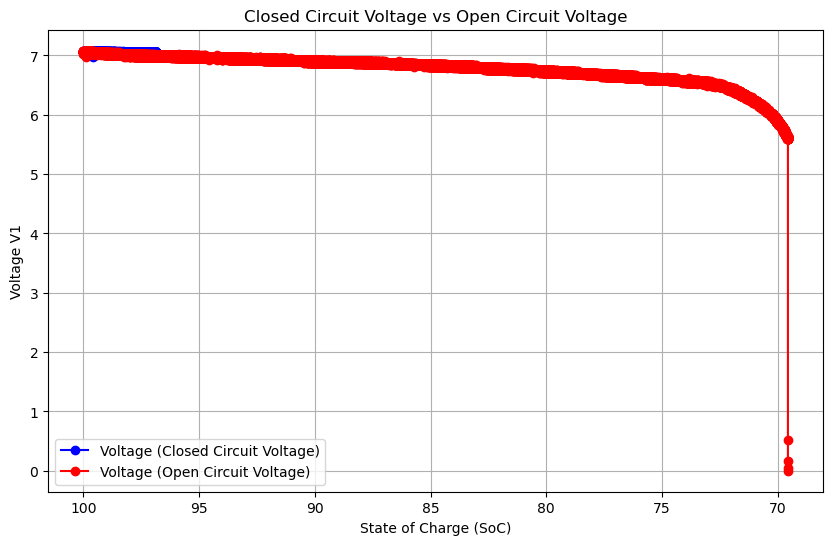

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Read the first CSV file
df1 = pd.read_csv('ccv-log.csv')

# Calculate State of Charge (SoC) for the first DataFrame
df1['SoC'] = ((271-(df['TotalCapacity'])) / 271)*100

# Read the second CSV file
df2 = pd.read_csv('OCV-LOG-UPDATED-OHM.csv')

# Calculate State of Charge (SoC) for the second DataFrame
df2['SoC'] = 100 - ((df2['TotalCapacity'] * 1) / 271)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot from the first DataFrame (ccv-log.csv)
plt.plot(df1['SoC'], df1['Voltage1'], marker='o', linestyle='-', color='b', label='Voltage (Closed Circuit Voltage)')

# Plot from the second DataFrame (OCV-LOG-UPDATED-OHM.csv)
plt.plot(df2['SoC'], df2['Voltage1'], marker='o', linestyle='-', color='r', label='Voltage (Open Circuit Voltage)')

plt.title('Closed Circuit Voltage vs Open Circuit Voltage')
plt.xlabel('State of Charge (SoC)')
plt.ylabel('Voltage V1')
plt.legend()
plt.gca().invert_xaxis()  # Reverse the x-axis scale
plt.grid(True)
plt.show()